### 解析 RSS

In [2]:
import feedparser

In [3]:
rss_url = "https://money.udn.com/rssfeed/news/1001/5588/10511?ch=money"
newsFeed = feedparser.parse(rss_url)
newsFeed

{'bozo': True,
 'entries': [{'title': '阿富汗政府垮台 恐削弱美國喊團結抗中分量',
   'title_detail': {'type': 'text/plain',
    'language': None,
    'base': 'https://money.udn.com/rssfeed/news/1001/5588/10511?ch=money',
    'value': '阿富汗政府垮台 恐削弱美國喊團結抗中分量'},
   'links': [{'rel': 'alternate',
     'type': 'text/html',
     'href': 'https://money.udn.com/money/story/10511/5676519'}],
   'link': 'https://money.udn.com/money/story/10511/5676519',
   'published': 'Mon, 16 Aug 2021 10:27:27 +0800',
   'published_parsed': time.struct_time(tm_year=2021, tm_mon=8, tm_mday=16, tm_hour=2, tm_min=27, tm_sec=27, tm_wday=0, tm_yday=228, tm_isdst=0),
   'summary': '<p><img src="https://pgw.udn.com.tw/gw/photo.php?u=https://uc.udn.com.tw/photo/2021/08/16/realtime/13338755.jpg&amp;s=Y&amp;x=0&amp;y=8&amp;sw=1280&amp;sh=852&amp;sl=W&amp;fw=180&amp;exp=3600" /><p>美國在阿富汗的20 年歷時最長戰爭即將告終，形象隨之一落千丈</p>',
   'summary_detail': {'type': 'text/html',
    'language': None,
    'base': 'https://money.udn.com/rssfeed/news/1001/5588/105

### 查看每個 entry 的 title url

In [4]:
i = 1
for e in newsFeed['entries']:
    title = e['title']
    link_url = e['links'][0]['href']
    print("%s, %s, %s"%(i, title, link_url))
    i = i + 1

1, 阿富汗政府垮台 恐削弱美國喊團結抗中分量, https://money.udn.com/money/story/10511/5676519
2, 美財長葉倫 傳將出訪大陸, https://money.udn.com/money/story/10511/5670445
3, 美國務院：副國務卿將會見中國新任駐美大使, https://money.udn.com/money/story/10511/5668635
4, 美中爭霸系列／梁國源：美中擴張權力貿易 台灣要想辦法當樞紐, https://money.udn.com/money/story/10511/5668065
5, 彭博：美財長葉倫考慮出訪中國大陸 美中經濟對談有譜?, https://money.udn.com/money/story/10511/5667951
6, 美中爭霸系列／謝國忠：騎虎難下 美中貨幣掛勾僵局難解, https://money.udn.com/money/story/10511/5667007
7, 美中爭霸系列／連平：中國不會主動打金融戰 美國也會非常小心, https://money.udn.com/money/story/10511/5666923
8, 美中爭霸系列四／美中金融戰合作又競爭 人民幣將取代一哥？, https://money.udn.com/money/story/10511/5662901
9, 口罩戴或不戴 全美一國兩制各自表態, https://money.udn.com/money/story/10511/5666757
10, 曼哈頓聯邦檢察官換人做 可望誕生首位非裔人士, https://money.udn.com/money/story/10511/5666511
11, 古莫請辭霍楚接手 紐約233年歷史出現首位女州長, https://money.udn.com/money/story/10511/5665711
12, 孟晚舟尋求停止引渡 辯護律師稱美國「不是世界警察」, https://money.udn.com/money/story/10511/5665666
13, 拜登1兆美元基建法案 項目財源與影響一覽, https://money.udn.com/money/story/10511/5665333
14, 美國務院挺

### 取得文章

In [5]:
import requests
from lxml import etree
from io import StringIO
import jieba
import pandas as pd
import time
import random

In [6]:
#指定辭典檔
jieba.set_dictionary('jieba_data/dict.txt.big')

In [7]:
#設定 request header
user_agent = "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/63.0.3239.132 Safari/537.36"
my_headers = {
    'User-Agent': user_agent,
    "accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8",
    "accept-Language": "zh-TW,zh;q=0.9,en-US;q=0.8,en;q=0.7",
    "accept-encoding": "gzip, deflate, br",
    "Connection": "keep-alive",
    "cache-control": "no-cache",
    "Accept-Charset": "UTF8,utf-8;q=0.7,*;q=0.7"
}

In [7]:
#爬文
each_article_text_list = []
for e in newsFeed['entries']:
    url = e['links'][0]['href']
    print(url)
    r = requests.get(url, headers = my_headers)
    if r.status_code == 200:
        parse_tree = etree.parse(StringIO(r.text), etree.HTMLParser())
        article_elements = parse_tree.xpath('//*[@id="article_body"]//p')
        for a_part in article_elements:
            if type(a_part.text) is str:
                each_article_text_list.append(a_part.text.strip())
        sleep_time = random.randint(3,10)
        print("sleep time: %s sec"%(sleep_time))
        time.sleep(sleep_time)
    all_article_text = ''.join(each_article_text_list)
all_article_text

https://money.udn.com/money/story/10511/5665333
sleep time: 10 sec
https://money.udn.com/money/story/10511/5665260
sleep time: 3 sec
https://money.udn.com/money/story/10511/5665244
sleep time: 7 sec
https://money.udn.com/money/story/10511/5658212
sleep time: 8 sec
https://money.udn.com/money/story/10511/5658151
sleep time: 6 sec
https://money.udn.com/money/story/10511/5654887
sleep time: 6 sec
https://money.udn.com/money/story/10511/5653906
sleep time: 4 sec
https://money.udn.com/money/story/10511/5653493
sleep time: 9 sec
https://money.udn.com/money/story/10511/5652828
sleep time: 10 sec
https://money.udn.com/money/story/10511/5649813
sleep time: 7 sec
https://money.udn.com/money/story/10511/5649669
sleep time: 5 sec
https://money.udn.com/money/story/10511/5647667
sleep time: 8 sec
https://money.udn.com/money/story/10511/5648767
sleep time: 7 sec
https://money.udn.com/money/story/10511/5646937
sleep time: 8 sec
https://money.udn.com/money/story/10511/5639815
sleep time: 3 sec
https://

'美國參議院今天通過拜登政府規模約1兆美元的跨黨派基礎建設法案，要翻新美國道路、橋梁、寬頻網路、飲水與強化環保，強化與中國競爭的優勢。這項立法是美國總統拜登國內政策的優先要務，1兆美元預算中包括5500億美元的新支出，剩餘部分則是先前批准的資金。以下為路透社整理的重點摘要。● 新支出方面：．道路、橋梁等大型計畫：1100億美元．客運及貨運鐵路：660億美元．寬頻基礎建設：650億美元．汰換鉛製水管等水利基礎設施：550億美元．公共運輸：392億美元．順應新環境－包括減輕洪患及野火、生態系統復原、氣候及網際網路安全等：472億美元．包括充電站在內的電動車基礎建設：75億美元．解決先前遺留下來的汙染問題，包括清理曾因開發造成汙染的地帶，回收廢棄礦場和土地、封填無人看管的油井和天然氣井：210億美元。● 新支出所需財源根據國會無黨派聯合稅務委員會（JointCommittee on Taxation）和國會預算處（Congressional Budget Office）估計，這項計畫有數個為支出提供資金的提議，包括從下列項目及未來10年從各項目中獲得的財政收益。．未動用的COVID-19紓困基金再利用：2100億美元．未來頻譜拍賣銷售額及2021年2月C頻段頻譜拍賣的收益：870億美元．經濟成長：560億美元．部分州的失業保險基金收益：530億美元．展延聯邦醫療保險D部分（Medicare Part D）的返款規則：510億美元．要求加密貨幣平台交出交易紀錄以追討稅款：280億美元．恢復超級基金（Superfund）費用徵收：145億美元（超級基金是用於清理危險廢棄物場所，以及處理事故溢出物或其他污染源排至環境等）● 後續進程「華爾街日報」指出，法案經參院通過後將送至眾議院。民主黨在眾院的優勢固然可在不需共和黨支持下讓法案通過，但須確保無人跑票；民主黨內有些人不滿這份跨黨派協商版，在運輸建設與飲水設備的支出上縮水。● 拜登「重建更好世界」抗中 美基建扮大補丸拜登今年6月在七大工業國集團（G7）領袖峰會全力促成「重建更好世界」計畫（Build Back BetterWorld），提供各國一個有別北京「一帶一路」的替代選擇。華爾街日報月前披露，華府將透過600億美元資本的美國國際開發金融公司（DFC），投資包括5G電信、港口乃至疫苗等海外基建。白宮新聞稿指出，這次參院通過的基

In [8]:
#分詞
seg_words_list = jieba.lcut(all_article_text)
seg_words_list

Building prefix dict from D:\My_data\python_project\text_mining\jieba_data\dict.txt.big ...
Dumping model to file cache C:\Users\yoshi\AppData\Local\Temp\jieba.u0a2e6fc0ef9a2586a7ff0c0f385f6676.cache
Loading model cost 1.047 seconds.
Prefix dict has been built successfully.


['美國參議院',
 '今天',
 '通過',
 '拜登',
 '政府',
 '規模',
 '約',
 '1',
 '兆',
 '美元',
 '的',
 '跨',
 '黨派',
 '基礎',
 '建設',
 '法案',
 '，',
 '要',
 '翻新',
 '美國',
 '道路',
 '、',
 '橋梁',
 '、',
 '寬頻網',
 '路',
 '、',
 '飲水',
 '與',
 '強化',
 '環保',
 '，',
 '強化',
 '與',
 '中國',
 '競爭',
 '的',
 '優勢',
 '。',
 '這項',
 '立法',
 '是',
 '美國',
 '總統',
 '拜登',
 '國內',
 '政策',
 '的',
 '優先',
 '要務',
 '，',
 '1',
 '兆',
 '美元',
 '預算',
 '中',
 '包括',
 '5500',
 '億美元',
 '的',
 '新',
 '支出',
 '，',
 '剩餘',
 '部',
 '分則',
 '是',
 '先前',
 '批准',
 '的',
 '資金',
 '。',
 '以下',
 '為',
 '路透社',
 '整理',
 '的',
 '重點',
 '摘要',
 '。',
 '●',
 ' ',
 '新',
 '支出',
 '方面',
 '：',
 '．',
 '道路',
 '、',
 '橋梁',
 '等',
 '大型',
 '計畫',
 '：',
 '1100',
 '億美元',
 '．',
 '客運',
 '及',
 '貨運',
 '鐵路',
 '：',
 '660',
 '億美元',
 '．',
 '寬頻',
 '基礎',
 '建設',
 '：',
 '650',
 '億美元',
 '．',
 '汰換',
 '鉛製',
 '水管',
 '等',
 '水利',
 '基礎設施',
 '：',
 '550',
 '億美元',
 '．',
 '公共',
 '運輸',
 '：',
 '392',
 '億美元',
 '．',
 '順應',
 '新',
 '環境',
 '－',
 '包括',
 '減輕',
 '洪患',
 '及',
 '野火',
 '、',
 '生態系統',
 '復原',
 '、',
 '氣候',
 '及',
 '網際網路',
 '安全',
 '等',
 '：',
 '472

In [24]:
#stop word
with open(file='jieba_data/stop_words.txt', mode='r', encoding='utf-8') as file:
    stop_words = file.read().split('\n')
stop_words

['the',
 'of',
 'is',
 'and',
 'to',
 'in',
 'that',
 'we',
 'for',
 'an',
 'are',
 'by',
 'be',
 'as',
 'on',
 'with',
 'can',
 'if',
 'from',
 'which',
 'you',
 'it',
 'this',
 'then',
 'at',
 'have',
 'all',
 'not',
 'one',
 'has',
 'or',
 'that',
 '的',
 '了',
 '和',
 '是',
 '就',
 '都',
 '而',
 '及',
 '與',
 '著',
 '或',
 '一個',
 '沒有',
 '我們',
 '你們',
 '妳們',
 '他們',
 '她們',
 '是否',
 '(',
 ')',
 '[',
 ']',
 '《',
 '》',
 '；',
 '『',
 '』',
 '：',
 ' ',
 '’',
 '（',
 '）',
 '、',
 '」',
 '「',
 '。',
 '，',
 '在',
 '他',
 '日',
 '對',
 '也',
 '中',
 '等',
 '但',
 '以',
 '將']

In [25]:
# stop word過濾後的分詞
seg_stop_words_list = []
seg_words_list = jieba.lcut(all_article_text)
for term in seg_words_list:
    if term not in stop_words:
        seg_stop_words_list.append(term)
seg_stop_words_list

['美國參議院',
 '今天',
 '通過',
 '拜登',
 '政府',
 '規模',
 '約',
 '1',
 '兆',
 '美元',
 '跨',
 '黨派',
 '基礎',
 '建設',
 '法案',
 '要',
 '翻新',
 '美國',
 '道路',
 '橋梁',
 '寬頻網',
 '路',
 '飲水',
 '強化',
 '環保',
 '強化',
 '中國',
 '競爭',
 '優勢',
 '這項',
 '立法',
 '美國',
 '總統',
 '拜登',
 '國內',
 '政策',
 '優先',
 '要務',
 '1',
 '兆',
 '美元',
 '預算',
 '包括',
 '5500',
 '億美元',
 '新',
 '支出',
 '剩餘',
 '部',
 '分則',
 '先前',
 '批准',
 '資金',
 '以下',
 '為',
 '路透社',
 '整理',
 '重點',
 '摘要',
 '●',
 '新',
 '支出',
 '方面',
 '．',
 '道路',
 '橋梁',
 '大型',
 '計畫',
 '1100',
 '億美元',
 '．',
 '客運',
 '貨運',
 '鐵路',
 '660',
 '億美元',
 '．',
 '寬頻',
 '基礎',
 '建設',
 '650',
 '億美元',
 '．',
 '汰換',
 '鉛製',
 '水管',
 '水利',
 '基礎設施',
 '550',
 '億美元',
 '．',
 '公共',
 '運輸',
 '392',
 '億美元',
 '．',
 '順應',
 '新',
 '環境',
 '－',
 '包括',
 '減輕',
 '洪患',
 '野火',
 '生態系統',
 '復原',
 '氣候',
 '網際網路',
 '安全',
 '472',
 '億美元',
 '．',
 '包括',
 '充電站',
 '在內',
 '電動車',
 '基礎',
 '建設',
 '75',
 '億美元',
 '．',
 '解決',
 '先前',
 '遺留下來',
 '汙染',
 '問題',
 '包括',
 '清理',
 '曾',
 '因',
 '開發',
 '造成',
 '汙染',
 '地帶',
 '回收',
 '廢棄',
 '礦場',
 '土地',
 '封填',
 '無人',
 '看管',
 '油井',

In [26]:
import matplotlib
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

## 繪製文字雲

In [27]:
# wordcloud.generate 參數是吃文字內容，以空白為文字區隔
seg_words = ' '.join(seg_stop_words_list)
#seg_words

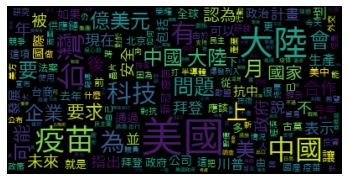

In [28]:
#不同字型
wordcloud = WordCloud(font_path='TaipeiSansTCBeta-Regular.ttf').generate(seg_words)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [23]:
from collections import Counter
seg_counter = Counter(seg_stop_words_list)
seg_counter

Counter({'美國參議院': 2,
         '今天': 9,
         '通過': 13,
         '拜登': 34,
         '政府': 31,
         '規模': 3,
         '約': 4,
         '1': 5,
         '兆': 2,
         '美元': 3,
         '跨': 3,
         '黨派': 2,
         '基礎': 5,
         '建設': 5,
         '法案': 11,
         '要': 24,
         '翻新': 1,
         '美國': 129,
         '道路': 5,
         '橋梁': 2,
         '寬頻網': 1,
         '路': 3,
         '飲水': 2,
         '強化': 3,
         '環保': 1,
         '中國': 79,
         '競爭': 9,
         '優勢': 3,
         '這項': 11,
         '立法': 1,
         '總統': 9,
         '國內': 5,
         '政策': 9,
         '優先': 2,
         '要務': 1,
         '預算': 2,
         '中': 40,
         '包括': 14,
         '5500': 1,
         '億美元': 23,
         '新': 14,
         '支出': 5,
         '剩餘': 1,
         '部': 1,
         '分則': 1,
         '先前': 2,
         '批准': 1,
         '資金': 4,
         '以下': 2,
         '為': 41,
         '路透社': 2,
         '整理': 1,
         '重點': 1,
         '摘要': 1,
         '●': 4,